In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
results = pd.read_csv(r'C:\Users\dhanu\results.csv')
advertisers = pd.read_csv(r'C:\Users\dhanu\advertisers.csv')
locations = pd.read_csv(r'C:\Users\dhanu\locations.csv')


In [10]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [12]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [14]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [18]:
results['State'] = results['State'].str.strip().str.lower()
locations['Location name'] = locations['Location name'].str.strip().str.lower()

merged_data = results.merge(
    locations,
    left_on = 'State',
    right_on = 'Location name',
    how = 'left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


C:\Users\dhanu\AppData\Local\Temp\ipykernel_18948\2644285093.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y = 'Amount spent (INR)', data = state_ad_spend , estimator = sum,palette='viridis',ci=None)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_18948\2644285093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y = 'Amount spent (INR)', data = state_ad_spend , estimator = sum,palette='viridis',ci=None)


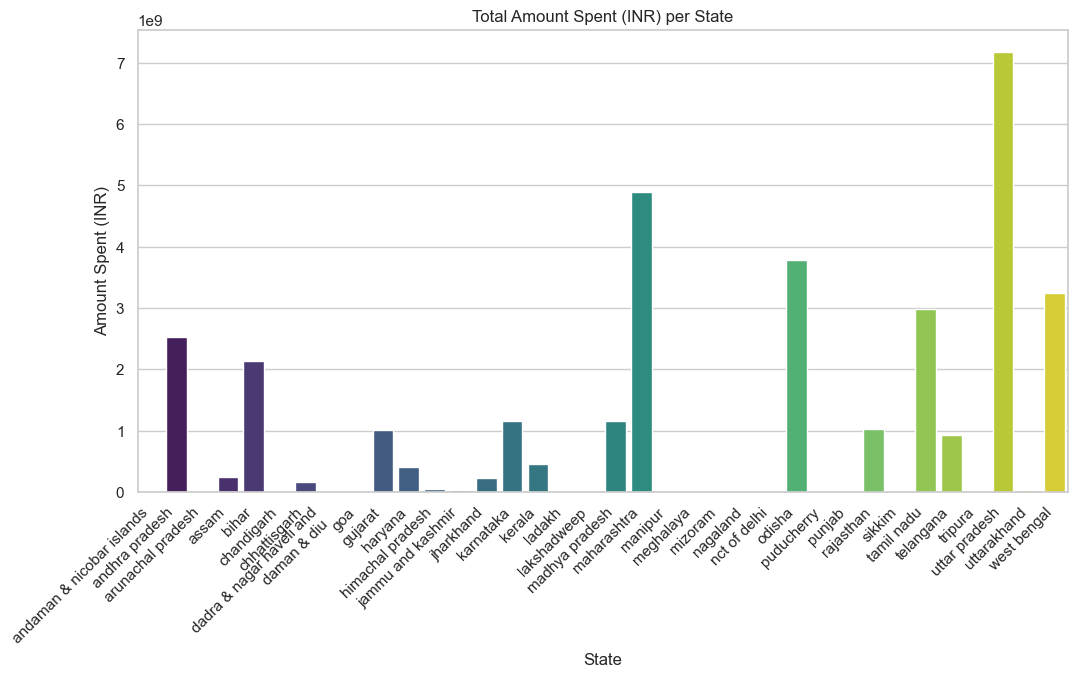

In [41]:
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()
state_ad_spend

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='State', y = 'Amount spent (INR)', data = state_ad_spend , estimator = sum,palette='viridis',ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Total Amount Spent (INR) per State')
plt.xlabel('State')
plt.ylabel('Amount Spent (INR)')
plt.show()


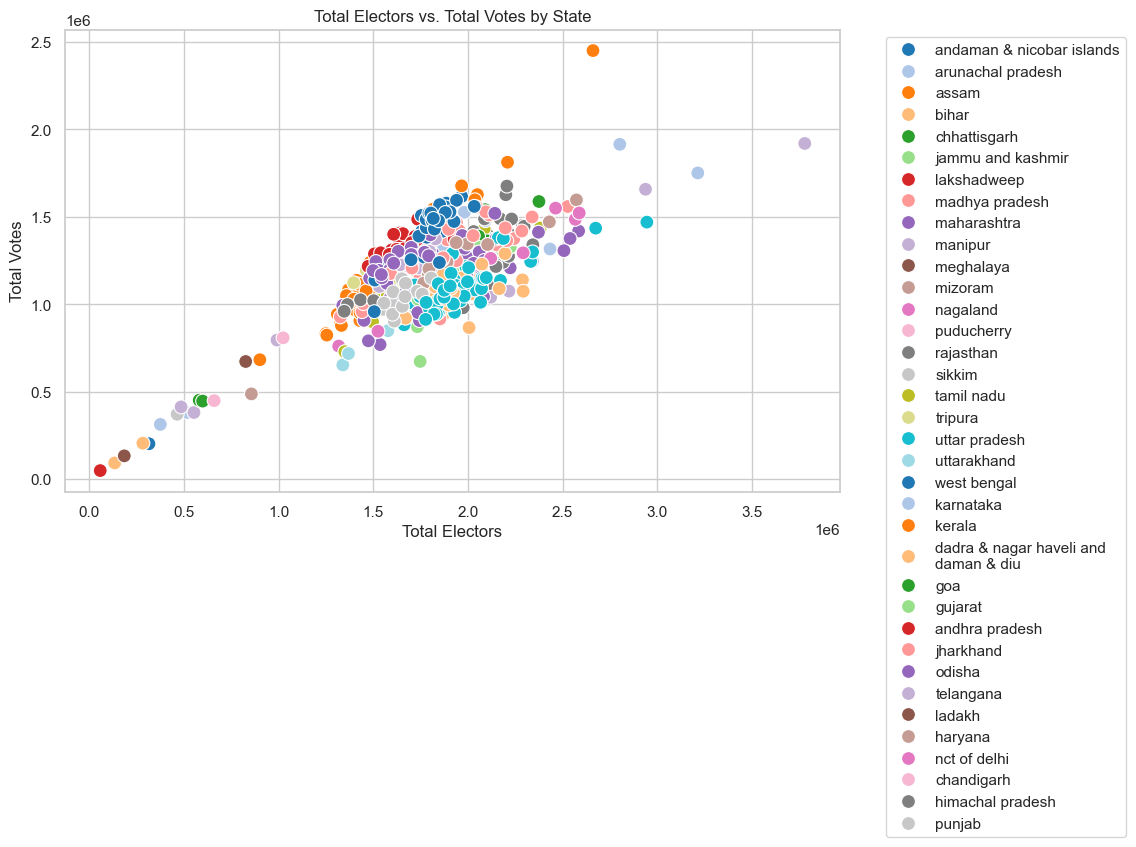

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Electors',y='Total Votes', hue = 'State',data = merged_data,palette='tab20',s=100)
plt.title('Total Electors vs. Total Votes by State')
plt.xlabel('Total Electors')
plt.ylabel('Total Votes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

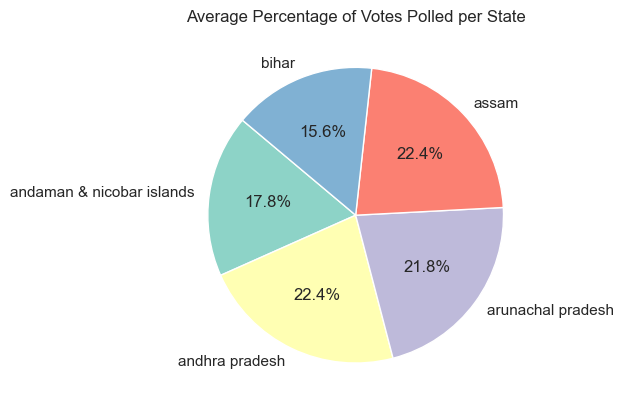

In [28]:
state_polled = merged_data.groupby('State')['Polled (%)'].mean().head()
plt.pie(state_polled,labels=state_polled.index,autopct = '%1.1f%%', startangle = 140,
        colors = sns.color_palette("Set3",len(state_polled)))
plt.title('Average Percentage of Votes Polled per State')
plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_18948\1024673932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Phase',y='Polled (%)', data = merged_data , palette = 'cubehelix')


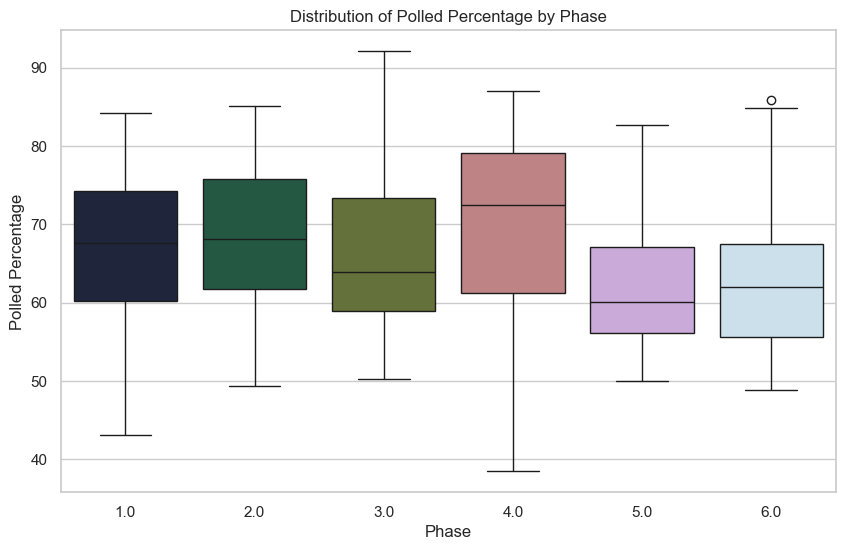

In [30]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Phase',y='Polled (%)', data = merged_data , palette = 'cubehelix')
plt.title('Distribution of Polled Percentage by Phase')
plt.xlabel('Phase')
plt.ylabel('Polled Percentage')
plt.show()

 Displays the distribution of polled percentages across different phases. It helps to identify the spread and any outliers in voting percentages across phases.

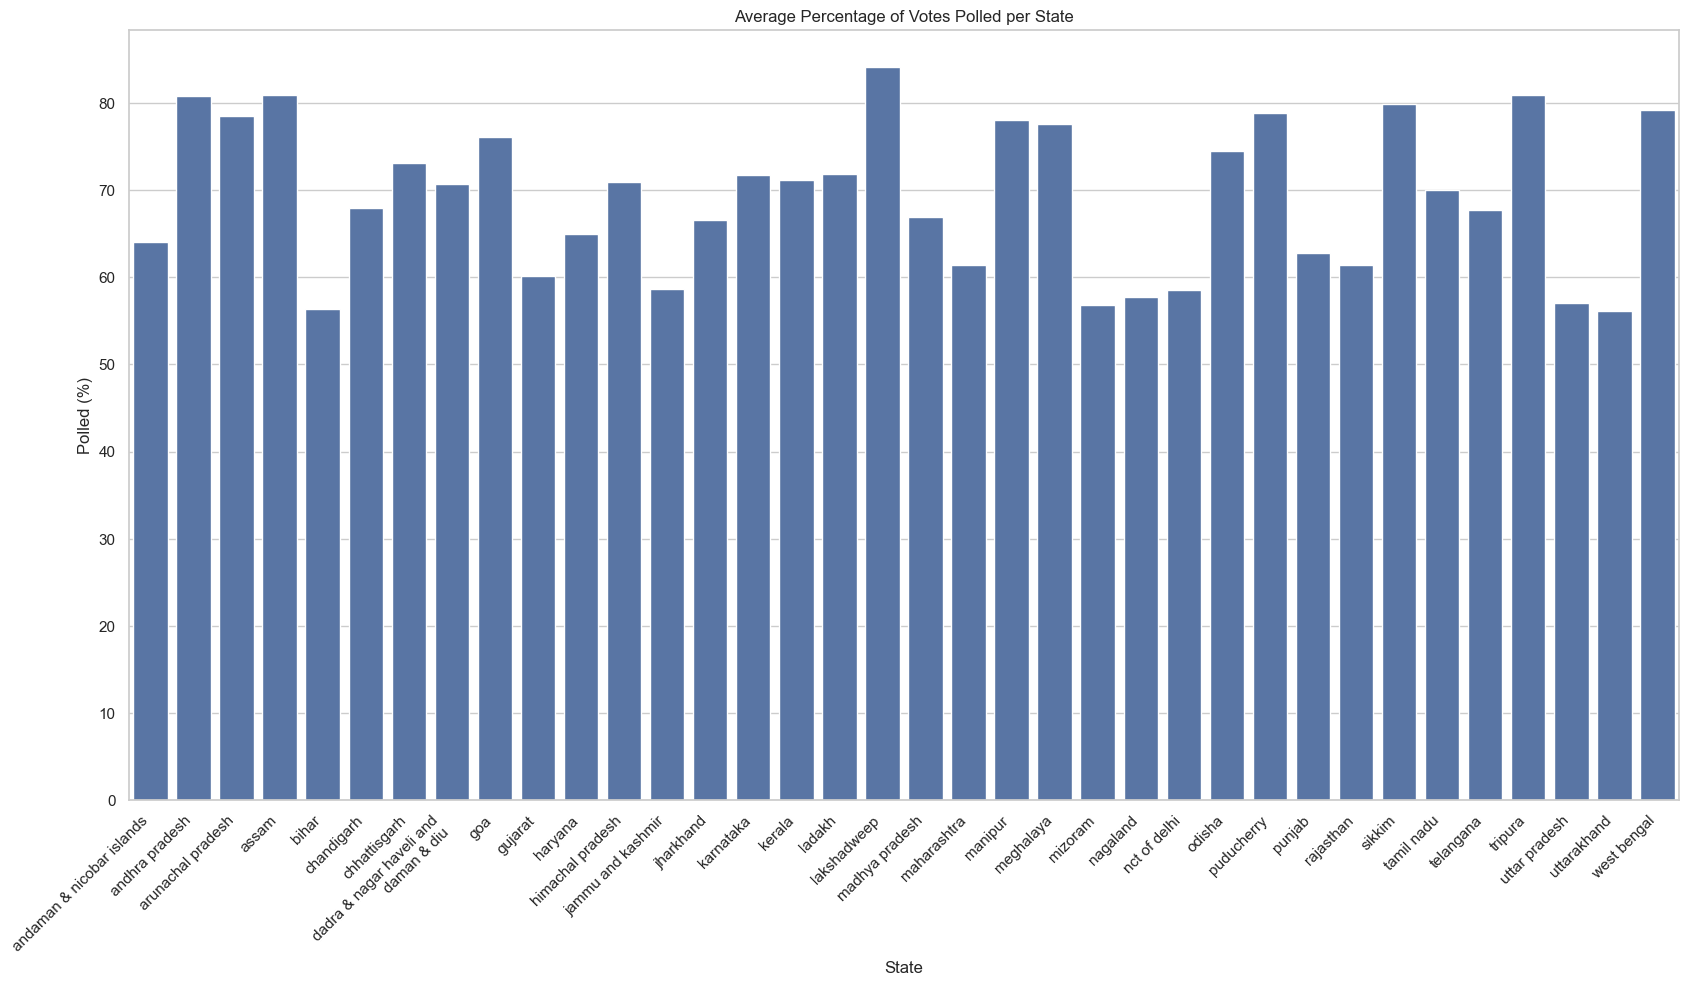

In [70]:
plt.figure(figsize=(20,10))

state_polled = merged_data.groupby('State')['Polled (%)'].mean().reset_index()
sns.barplot(x='State', y = 'Polled (%)',data = state_polled)
plt.title('Average Percentage of Votes Polled per State')
plt.xticks(rotation=45, ha='right')
plt.show()



Lakshadweep has the highest average voter turnout at nearly 80%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 70%. On the other end of the spectrum, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, around 50-55%.

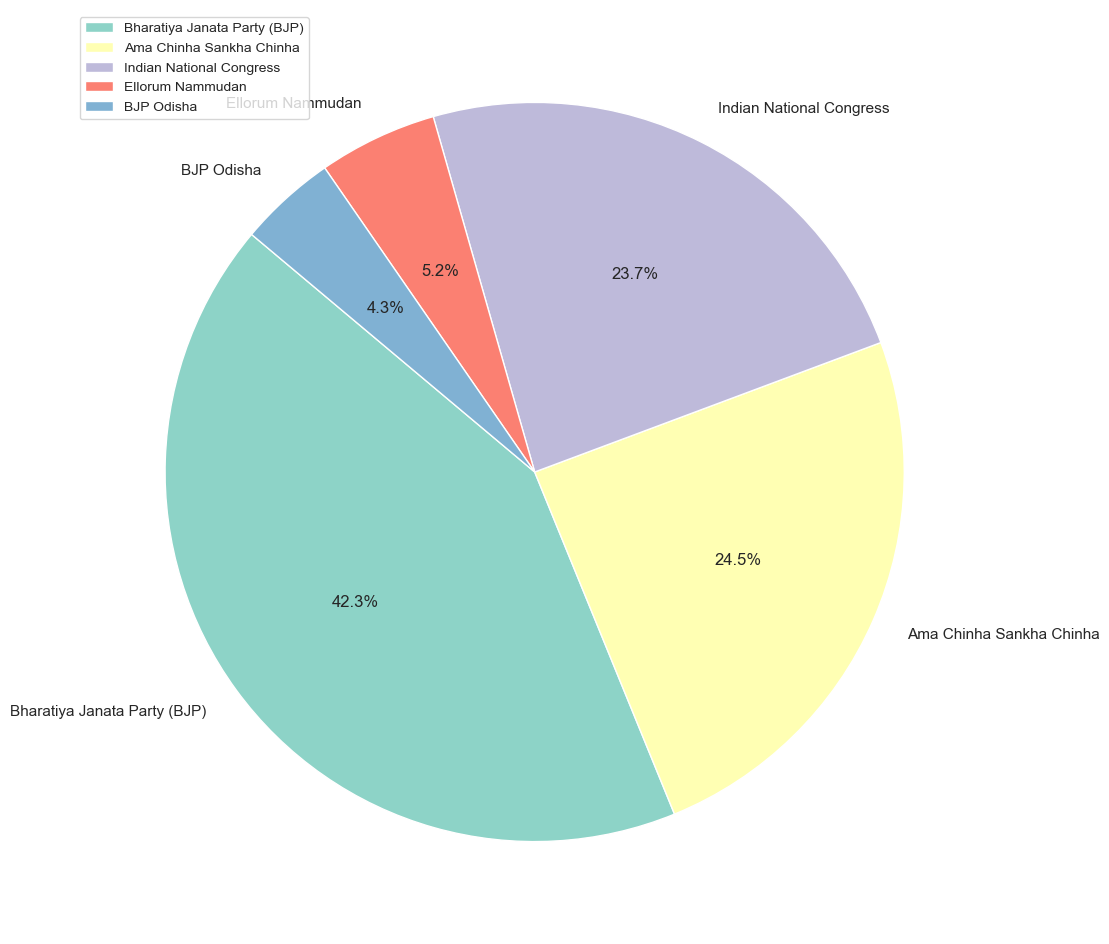

In [118]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'],errors='coerce')
advertisers.dropna(subset = ['Amount spent (INR)'],inplace = True)

party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)
top_5_parties = party_ad_spend.head().reset_index()
top_5_parties

plt.figure(figsize=(12,12))
plt.pie(
    top_5_parties['Amount spent (INR)'],
    labels=top_5_parties['Page name'], 
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3")
)
plt.legend(loc='upper left',fontsize='small')
plt.show()


Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.



In [124]:
merged_data.columns

Index(['_id', 'Sl No', 'State', 'PC_Name', 'Total Electors', 'Polled (%)',
       'Total Votes', 'Phase', 'Location name', 'Amount spent (INR)'],
      dtype='object')

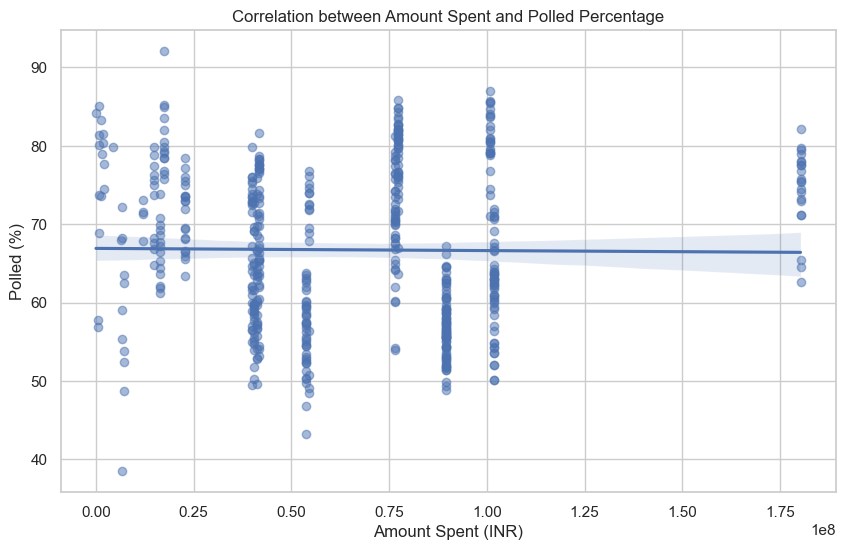

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x='Amount spent (INR)', y='Polled (%)', scatter_kws={'alpha':0.5})

# Title and labels
plt.title('Correlation between Amount Spent and Polled Percentage')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Polled (%)')

plt.show()


The scatter plot shows no strong correlation between Amount spent (INR) and Polled (%), as indicated by the nearly flat regression line. This suggests that higher ad spending does not necessarily increase the polling percentage. The wide spread of points implies other factors may influence polling outcomes.

In [137]:
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.010688. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

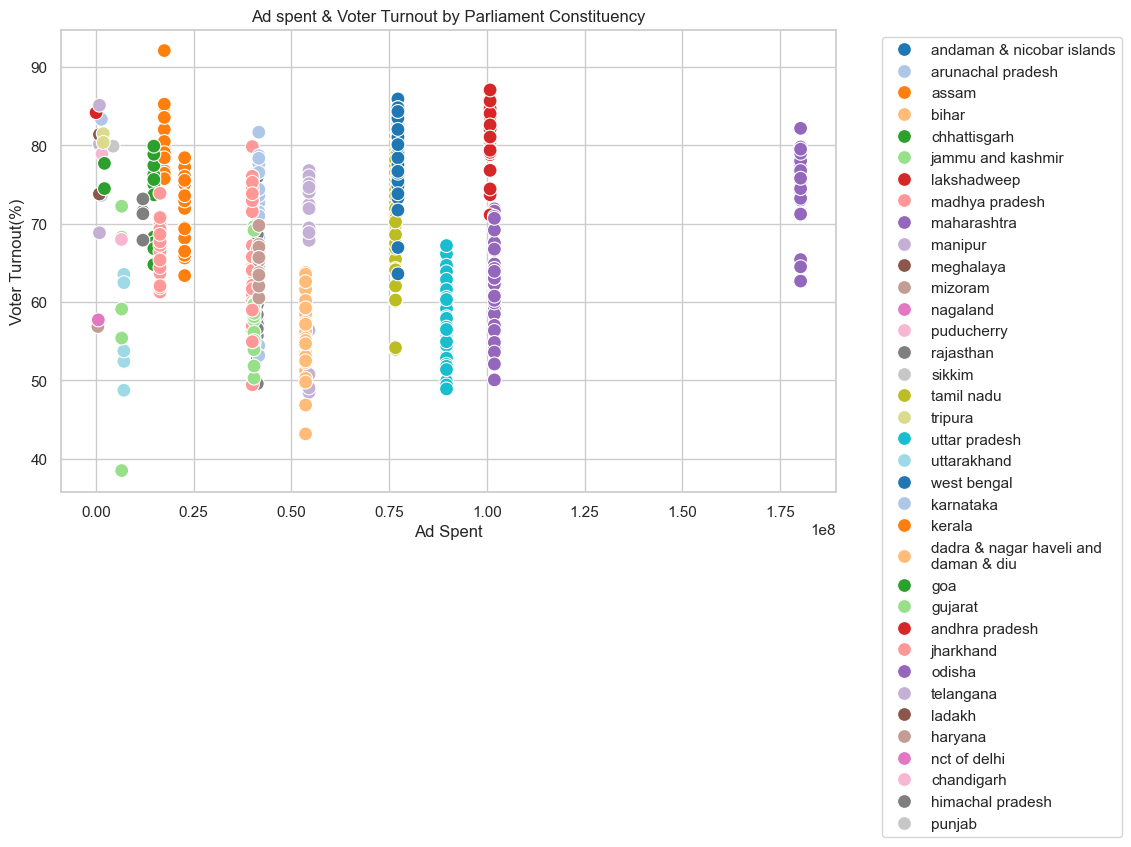

In [146]:
merged_constituency_data = results.merge(locations,left_on = 'State',right_on = 'Location name',how='left')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Amount spent (INR)',y='Polled (%)',hue='State',
                data= merged_constituency_data,palette='tab20',s=100)
plt.title('Ad spent & Voter Turnout by Parliament Constituency')
plt.xlabel('Ad Spent')
plt.ylabel('Voter Turnout(%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

higher ad spending does not necessarily correlate with higher voter turnout. Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR. This suggests that other factors besides ad spend may play a significant role in influencing voter turnout.

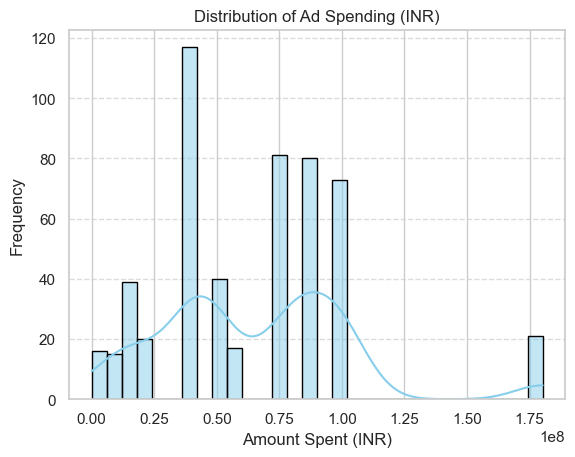

In [153]:
sns.histplot(x='Amount spent (INR)', bins=30, data=merged_data, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Ad Spending (INR)')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()


histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. The box plot highlights that the median ad spend is around 70M INR, with the interquartile range (IQR) spanning from approximately 30M to 110M INR. There are a few outliers, particularly a constituency with an exceptionally high ad spend above 150M INR. This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.



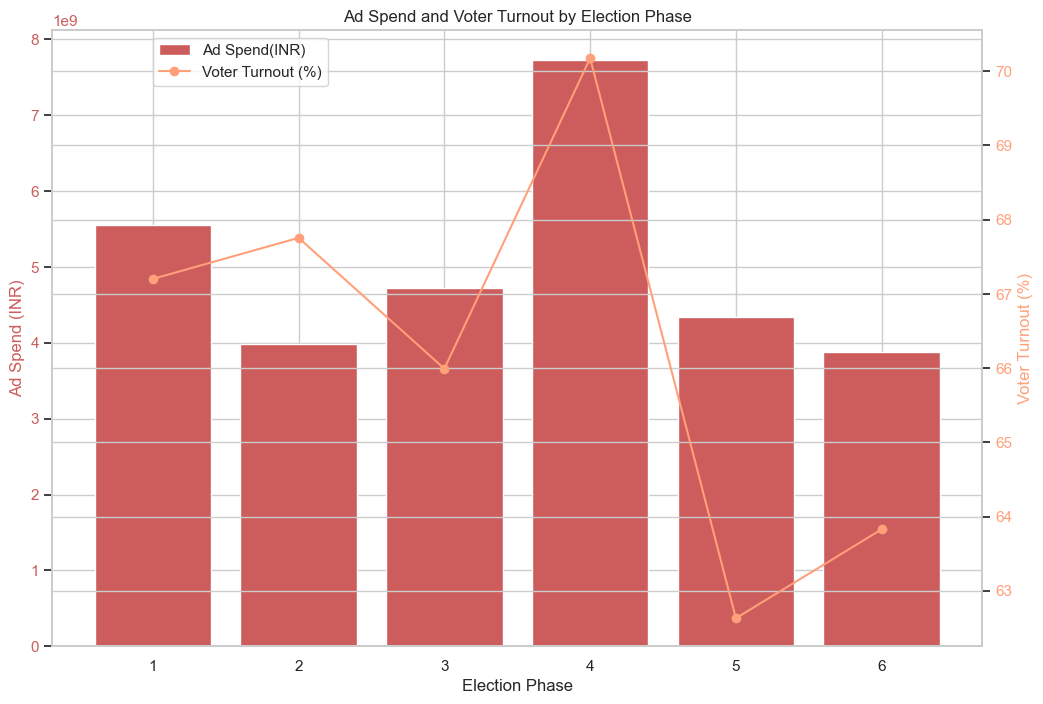

In [170]:
phase_analysis = merged_data.groupby('Phase').agg({'Amount spent (INR)':'sum',
                                                   'Polled (%)':'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(phase_analysis['Phase'],phase_analysis['Amount spent (INR)'],color='indianred',label='Ad Spend(INR)')
ax1.set_xlabel('Election Phase')
ax1.set_ylabel('Ad Spend (INR)',color = 'indianred')
ax1.tick_params(axis = 'y',labelcolor='indianred')

ax2 = ax1.twinx()
ax2.plot(phase_analysis['Phase'],phase_analysis['Polled (%)'],color = 'lightsalmon',marker = 'o',label='Voter Turnout (%)')
ax2.set_ylabel('Voter Turnout (%)', color='lightsalmon')
ax2.tick_params(axis='y', labelcolor='lightsalmon')

plt.title('Ad Spend and Voter Turnout by Election Phase')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1), bbox_transform=ax1.transAxes)
plt.show()